In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./titanic/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
import pandas_profiling as pp
profile = pp.ProfileReport(df=df, title='Análise Exploratória')

In [4]:
profile.to_file(output_file='Profile.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 118.61it/s]


In [5]:
X = df.iloc[:,[2,4,5]]
y = df.Survived

In [6]:
print(f"A entrada X possui missing? {X.isnull().values.any()}")
print(f"Quantos? {X.isnull().sum().sum()}")
print(f"Quais colunas possuem missing? \n {X.isnull().sum()}")

A entrada X possui missing? True
Quantos? 177
Quais colunas possuem missing? 
 Pclass      0
Sex         0
Age       177
dtype: int64


In [7]:
df = df.dropna(subset=['Age'])
df = df.reset_index(drop=True)

In [8]:
X = df.iloc[:,[2,4,5]].values
y = df.Survived.values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(571, 3)
(143, 3)
(571,)
(143,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
##====================================================================##

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[68 11]
 [11 53]]


0.8461538461538461

In [16]:
df_comp = pd.DataFrame( columns=['Modelo', 'ExclusaoMissing', 'GridSearch', 'Acurácia', 'Kappa', 'F1'])

In [17]:
def inclui_resultado(modelo, exclusao_missing, grid_search, acuracia, k, f1):
    i = df_comp.shape[0]
    df_comp.loc[i] = [modelo, exclusao_missing, grid_search, acuracia, k, f1]

In [18]:
def pred_and_evalue(X_test, y_test, model):

    y_pred = model.predict(X_test)

    # Acc
    from sklearn.metrics import accuracy_score
    acuracia = accuracy_score(y_test, y_pred)
    print('Acurácia:', acuracia)

    # Kappa
    from sklearn.metrics import cohen_kappa_score
    k = cohen_kappa_score(y_test, y_pred)
    print('Kappa:', k)

    # F1
    from sklearn.metrics import f1_score
    f1 = f1_score(y_test, y_pred)
    print('F1:', f1)

    # Matriz Confusão
    from sklearn.metrics import confusion_matrix
    confMatrix = confusion_matrix(y_test, y_pred)
    
    ax = plt.subplot()
    sns.heatmap(confMatrix, annot=True, fmt=".0f")
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz Confusão')

    ## Colocar nomes
    ax.xaxis.set_ticklabels(['Sobreviveu', 'Morreu'])
    ax.yaxis.set_ticklabels(['Sobreviveu', 'Morreu'])
    plt.show()
    return acuracia, k, f1

Classificação: Regressão Logística:
Acurácia: 0.8461538461538461
Kappa: 0.688884493670886
F1: 0.828125


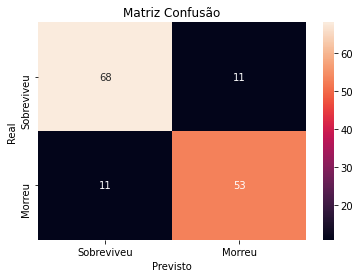

In [19]:
print('Classificação: Regressão Logística:')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('Regressão Logística', 1, 0, acuracia, k, f1)

In [20]:
##====================================================================##

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)


KNeighborsClassifier()

Classificação: KNN
Acurácia: 0.8041958041958042
Kappa: 0.6004789463181002
F1: 0.7704918032786885


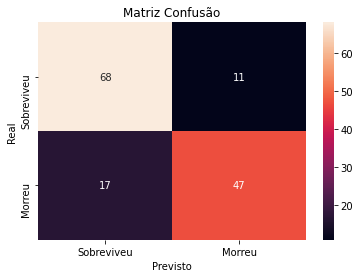

In [22]:
print('Classificação: KNN')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('KNN', 1, 0, acuracia, k, f1)

In [23]:
##====================================================================##

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]
print("# Tuning hyper-parâmetros parar F1 score")
print()
model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        79
           1       0.71      0.75      0.73        64

    accuracy                           0.75       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.75      0.75       143




Classificação: KNN com GridSearch
Acurácia: 0.7482517482517482
Kappa: 0.493904836806921
F1: 0.7272727272727272


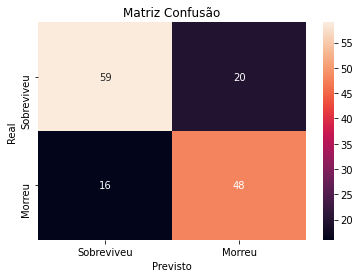

In [25]:
print('Classificação: KNN com GridSearch')
acuracia, k, f1 = pred_and_evalue(X_test,y_test,model)
inclui_resultado('KNN_GS', 1, 1, acuracia, k, f1)

In [26]:
##====================================================================##

In [27]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

Classificação: SVM
Acurácia: 0.7762237762237763
Kappa: 0.5307629204265791
F1: 0.6923076923076923


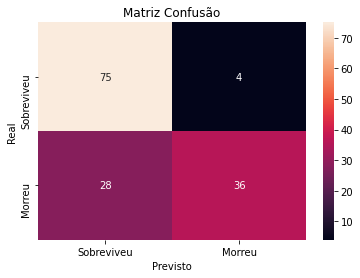

In [28]:
print('Classificação: SVM')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('SVM', 1, 0, acuracia, k, f1)

In [29]:
##====================================================================##

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_leaf=5, random_state=0, criterion='gini')
model.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=5, random_state=0)

[Text(436.4264018691589, 520.95, 'X[1] <= -0.298\ngini = 0.478\nsamples = 571\nvalue = [345, 226]\nclass = Não Sobreviveu'),
 Text(234.6728971962617, 475.65000000000003, 'X[0] <= 0.286\ngini = 0.385\nsamples = 204\nvalue = [53, 151]\nclass = Sobreviveu'),
 Text(114.72897196261682, 430.35, 'X[0] <= -0.92\ngini = 0.08\nsamples = 120\nvalue = [5, 115]\nclass = Sobreviveu'),
 Text(62.579439252336456, 385.05, 'X[2] <= -0.283\ngini = 0.03\nsamples = 65\nvalue = [1, 64]\nclass = Sobreviveu'),
 Text(41.7196261682243, 339.75, 'X[2] <= -0.421\ngini = 0.083\nsamples = 23\nvalue = [1, 22]\nclass = Sobreviveu'),
 Text(20.85981308411215, 294.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = Sobreviveu'),
 Text(62.579439252336456, 294.45, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Sobreviveu'),
 Text(83.4392523364486, 339.75, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]\nclass = Sobreviveu'),
 Text(166.8785046728972, 385.05, 'X[2] <= 0.51\ngini = 0.135\nsamples = 55\nvalue = [4, 51]\nclas

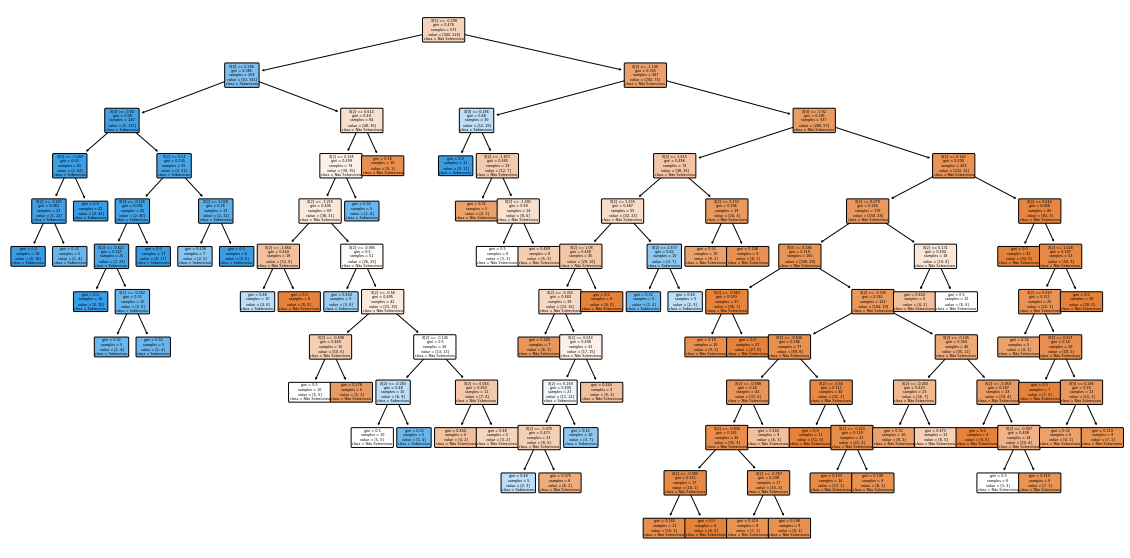

In [31]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(model, class_names=['Não Sobreviveu', 'Sobreviveu'],filled=True, rounded=True)


Classificação: Árvore de Decisão (Gini)
Acurácia: 0.8461538461538461
Kappa: 0.6879587383455663
F1: 0.8253968253968254


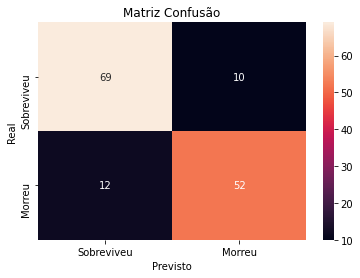

In [32]:
print('Classificação: Árvore de Decisão (Gini)')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('Árvore Decisão', 1, 0, acuracia, k, f1)

In [33]:
##====================================================================##

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)

y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        79
           1       0.82      0.80      0.81        64

    accuracy                           0.83       143
   macro avg       0.83      0.83      0.83       143
weighted avg       0.83      0.83      0.83       143




Classificação: GridSearch Árvore de Decisão (Gini)
Acurácia: 0.8321678321678322
Kappa: 0.659591350922436
F1: 0.8095238095238094


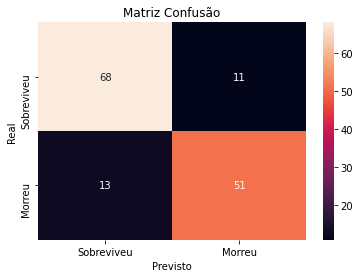

In [35]:
print('Classificação: GridSearch Árvore de Decisão (Gini)')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('Árvore Decisão_GS', 1, 1, acuracia, k, f1)

In [36]:
print('Melhores Parâmetros:', model.best_params_)

Melhores Parâmetros: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 4}


[Text(409.975, 520.95, 'X[1] <= -0.298\ngini = 0.478\nsamples = 571\nvalue = [345, 226]\nclass = Não Sobreviveu'),
 Text(201.50000000000003, 475.65000000000003, 'X[0] <= 0.286\ngini = 0.385\nsamples = 204\nvalue = [53, 151]\nclass = Sobreviveu'),
 Text(90.93333333333334, 430.35, 'X[0] <= -0.92\ngini = 0.08\nsamples = 120\nvalue = [5, 115]\nclass = Sobreviveu'),
 Text(49.60000000000001, 385.05, 'X[2] <= -0.283\ngini = 0.03\nsamples = 65\nvalue = [1, 64]\nclass = Sobreviveu'),
 Text(33.06666666666667, 339.75, 'X[2] <= -0.421\ngini = 0.083\nsamples = 23\nvalue = [1, 22]\nclass = Sobreviveu'),
 Text(16.533333333333335, 294.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = Sobreviveu'),
 Text(49.60000000000001, 294.45, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Sobreviveu'),
 Text(66.13333333333334, 339.75, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]\nclass = Sobreviveu'),
 Text(132.26666666666668, 385.05, 'X[2] <= 0.51\ngini = 0.135\nsamples = 55\nvalue = [4, 51]\nclass = Sobr

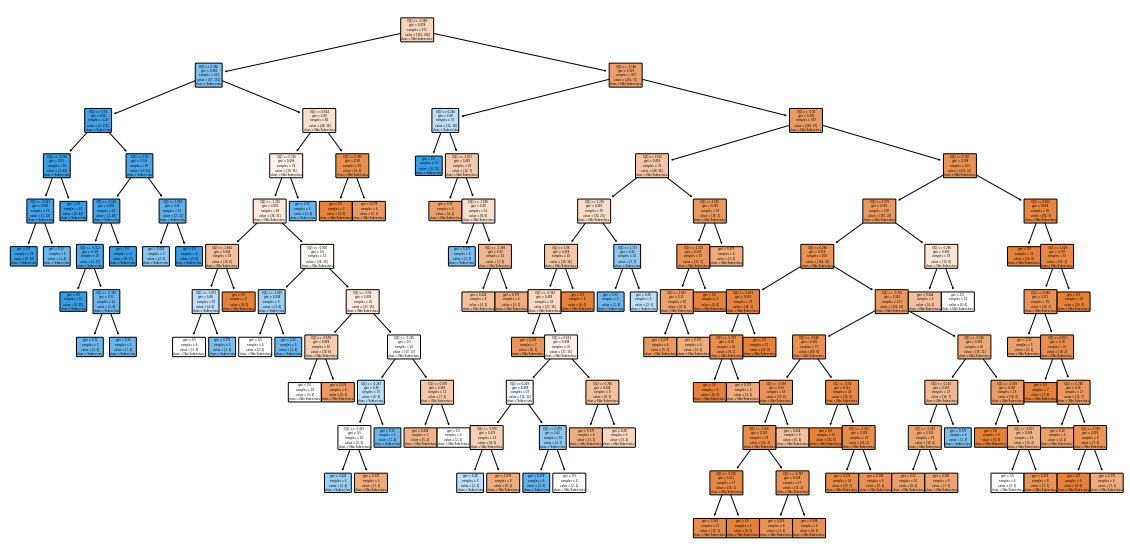

In [37]:
fig, ax = plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model.best_estimator_, class_names=['Não Sobreviveu', 'Sobreviveu'], 
               filled=True, rounded=True) ##, feature_names=data.columns); Ajustar para incluir esse parâmetro
##====================================================================##

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_leaf=5, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=0)

Classificação: Random Forest
Acurácia: 0.7902097902097902
Kappa: 0.5770065075921909
F1: 0.7692307692307692


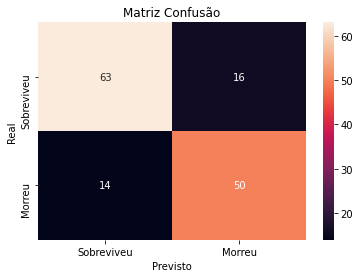

In [39]:
print('Classificação: Random Forest')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('Random Forest', 1, 0, acuracia, k, f1)

In [40]:
##====================================================================##
##===========SUSTITUINDO OS MISSINGS PELA MÉDIA DAS IDADES============##
##====================================================================##

In [41]:
df = pd.read_csv('./titanic/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [42]:
X = df.iloc[:,[2,4,5]]
y = df.Survived

In [43]:
print(f"A entrada X possui missing? {X.isnull().values.any()}")
print(f"Quantos? {X.isnull().sum().sum()}")
print(f"Quais colunas possuem missing? \n {X.isnull().sum()}")

A entrada X possui missing? True
Quantos? 177
Quais colunas possuem missing? 
 Pclass      0
Sex         0
Age       177
dtype: int64


In [44]:
X = df.iloc[:,[2,4,5]].values
y = df.Survived.values

In [45]:
from sklearn.impute import SimpleImputer
si1 = SimpleImputer(missing_values=np.nan, strategy='mean')
si1.fit(X[:,2:])
X[:,2:] = si1.transform(X[:,2:])

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 3)
(179, 3)
(712,)
(179,)


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[93 17]
 [18 51]]


0.8044692737430168

Classificação: Regressão Logística:
Acurácia: 0.8044692737430168
Kappa: 0.5861681749124777
F1: 0.7445255474452556


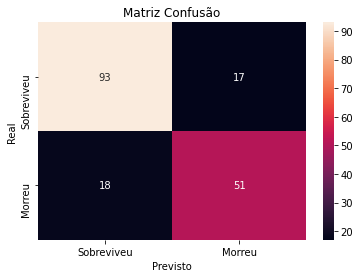

In [52]:
print('Classificação: Regressão Logística:')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('Regressão Logística', 0, 0, acuracia, k, f1)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)


KNeighborsClassifier()

Classificação: KNN
Acurácia: 0.8212290502793296
Kappa: 0.6164456943886434
F1: 0.7575757575757576


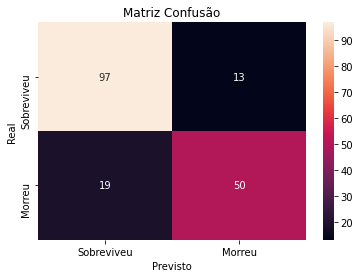

In [54]:
print('Classificação: KNN')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('KNN', 0, 0, acuracia, k, f1)

In [55]:
##====================================================================##

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]
print("# Tuning hyper-parâmetros parar F1 score")
print()
model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179




Classificação: KNN com GridSearch
Acurácia: 0.8212290502793296
Kappa: 0.6143280366280636
F1: 0.7538461538461538


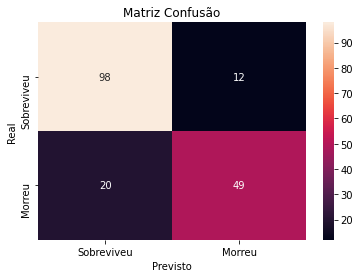

In [57]:
print('Classificação: KNN com GridSearch')
acuracia, k, f1 = pred_and_evalue(X_test,y_test,model)
inclui_resultado('KNN_GS', 0, 1, acuracia, k, f1)

In [58]:
##====================================================================##

In [59]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

Classificação: SVM
Acurácia: 0.8100558659217877
Kappa: 0.5924735502879336
F1: 0.7424242424242424


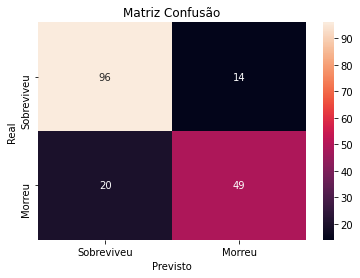

In [60]:
print('Classificação: SVM')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('SVM', 0, 0, acuracia, k, f1)

In [61]:
##====================================================================##

In [62]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_leaf=5, random_state=0, criterion='gini')
model.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=5, random_state=0)

[Text(406.77478448275866, 526.6125000000001, 'X[1] <= -0.322\ngini = 0.473\nsamples = 712\nvalue = [439, 273]\nclass = Não Sobreviveu'),
 Text(216.46551724137933, 492.63750000000005, 'X[0] <= 0.219\ngini = 0.38\nsamples = 247\nvalue = [63, 184]\nclass = Sobreviveu'),
 Text(105.82758620689656, 458.6625, 'X[2] <= -1.738\ngini = 0.114\nsamples = 132\nvalue = [8, 124]\nclass = Sobreviveu'),
 Text(86.58620689655173, 424.6875, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Sobreviveu'),
 Text(125.0689655172414, 424.6875, 'X[2] <= 0.555\ngini = 0.104\nsamples = 127\nvalue = [7, 120]\nclass = Sobreviveu'),
 Text(76.96551724137932, 390.7125, 'X[2] <= -0.171\ngini = 0.066\nsamples = 88\nvalue = [3, 85]\nclass = Sobreviveu'),
 Text(57.72413793103449, 356.7375, 'X[2] <= -0.4\ngini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = Sobreviveu'),
 Text(38.48275862068966, 322.76250000000005, 'X[2] <= -0.477\ngini = 0.054\nsamples = 36\nvalue = [1, 35]\nclass = Sobreviveu'),
 Text(19.24137931034483, 

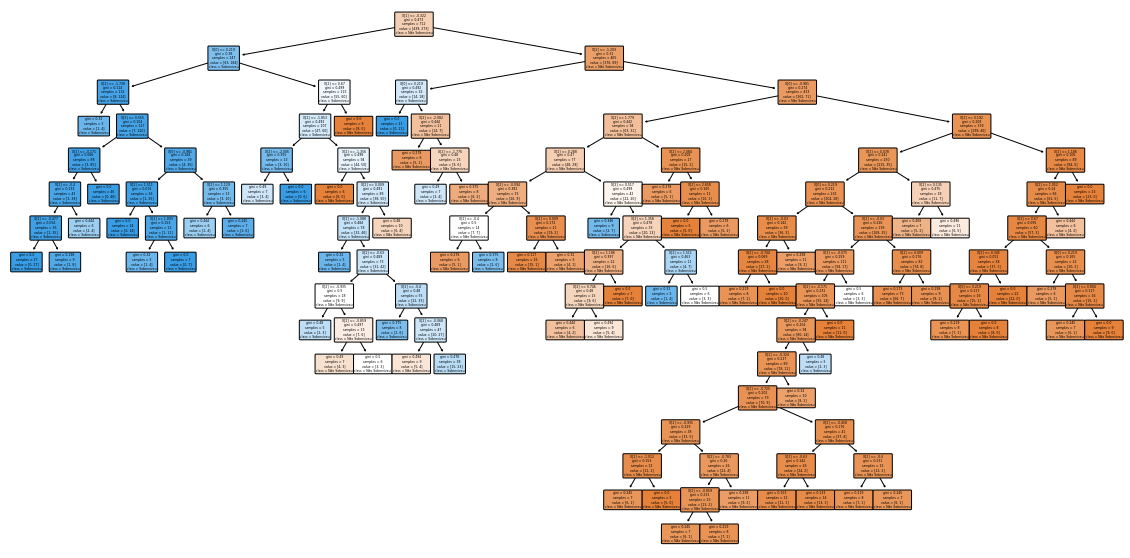

In [63]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(model, class_names=['Não Sobreviveu', 'Sobreviveu'],filled=True, rounded=True)


Classificação: Árvore de Decisão (Gini)
Acurácia: 0.8324022346368715
Kappa: 0.6364251861882193
F1: 0.7656250000000001


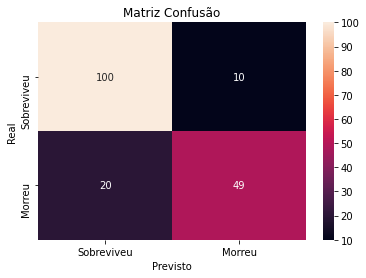

In [64]:
print('Classificação: Árvore de Decisão (Gini)')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('Árvore Decisão', 0, 0, acuracia, k, f1)

In [65]:
##====================================================================##

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)

y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179




Classificação: GridSearch Árvore de Decisão
Acurácia: 0.7932960893854749
Kappa: 0.5601381417281
F1: 0.725925925925926


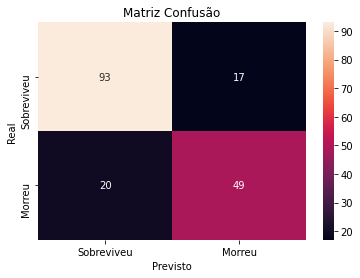

In [67]:
print('Classificação: GridSearch Árvore de Decisão')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('Árvore Decisão_GS', 0, 1, acuracia, k, f1)

In [68]:
print('Melhores Parâmetros:', model.best_params_)

Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}


[Text(421.5326086956522, 513.4, 'X[1] <= -0.322\nentropy = 0.96\nsamples = 712\nvalue = [439, 273]\nclass = Não Sobreviveu'),
 Text(204.70108695652172, 453.0, 'X[0] <= 0.219\nentropy = 0.819\nsamples = 247\nvalue = [63, 184]\nclass = Sobreviveu'),
 Text(87.94565217391305, 392.6, 'X[2] <= -2.082\nentropy = 0.33\nsamples = 132\nvalue = [8, 124]\nclass = Sobreviveu'),
 Text(75.81521739130434, 332.2, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não Sobreviveu'),
 Text(100.07608695652173, 332.2, 'X[2] <= -0.477\nentropy = 0.301\nsamples = 131\nvalue = [7, 124]\nclass = Sobreviveu'),
 Text(87.94565217391305, 271.8, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31]\nclass = Sobreviveu'),
 Text(112.20652173913044, 271.8, 'X[2] <= -0.171\nentropy = 0.366\nsamples = 100\nvalue = [7, 93]\nclass = Sobreviveu'),
 Text(54.586956521739125, 211.39999999999998, 'X[2] <= -0.4\nentropy = 0.722\nsamples = 15\nvalue = [3, 12]\nclass = Sobreviveu'),
 Text(24.26086956521739, 151.0, 'X[0] <= -0.981\nentro

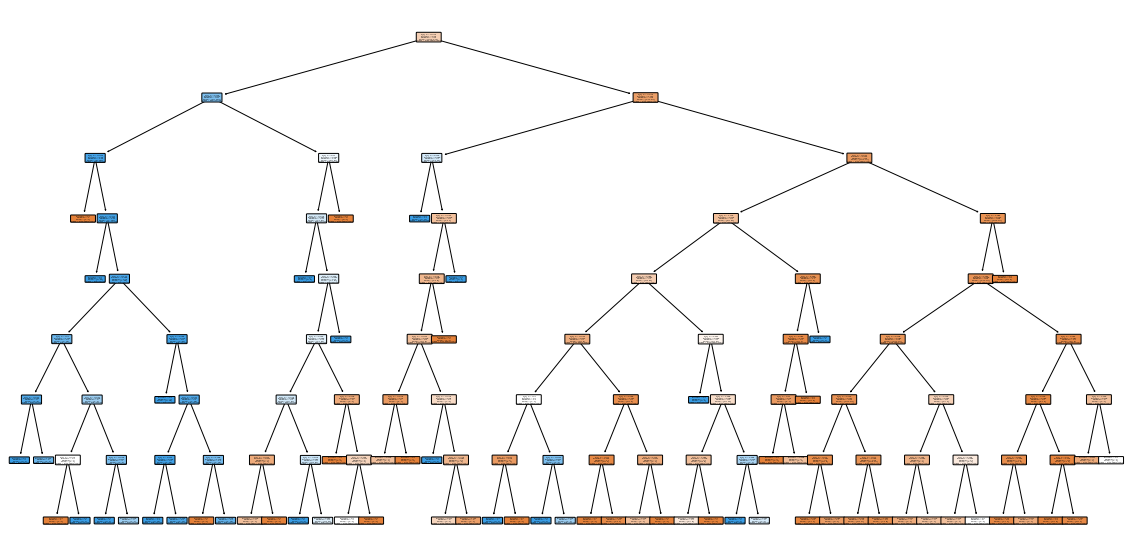

In [69]:
fig, ax = plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model.best_estimator_, class_names=['Não Sobreviveu', 'Sobreviveu'], 
               filled=True, rounded=True) ##, feature_names=data.columns); Ajustar para incluir esse parâmetro
##====================================================================##

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_leaf=5, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=0)

Classificação: Random Forest
Acurácia: 0.8324022346368715
Kappa: 0.6364251861882193
F1: 0.7656250000000001


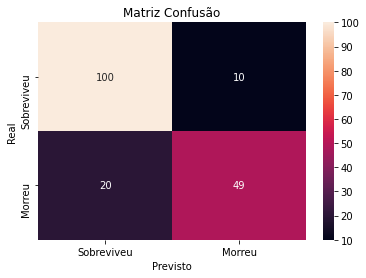

In [71]:
print('Classificação: Random Forest')
acuracia, k, f1 = pred_and_evalue(X_test, y_test, model)
inclui_resultado('Random Forest', 0, 0, acuracia, k, f1)

In [72]:
print(df_comp)

                 Modelo ExclusaoMissing GridSearch  Acurácia     Kappa  \
0   Regressão Logística               1          0  0.846154  0.688884   
1                   KNN               1          0  0.804196  0.600479   
2                KNN_GS               1          1  0.748252  0.493905   
3                   SVM               1          0  0.776224  0.530763   
4        Árvore Decisão               1          0  0.846154  0.687959   
5     Árvore Decisão_GS               1          1  0.832168  0.659591   
6         Random Forest               1          0  0.790210  0.577007   
7   Regressão Logística               0          0  0.804469  0.586168   
8                   KNN               0          0  0.821229  0.616446   
9                KNN_GS               0          1  0.821229  0.614328   
10                  SVM               0          0  0.810056  0.592474   
11       Árvore Decisão               0          0  0.832402  0.636425   
12    Árvore Decisão_GS               